In [2]:
import os,sys
# Change and check directory
os.chdir('C:\WGU\Capstone')
os.getcwd()

'C:\\WGU\\Capstone'

In [3]:
# import packages needed
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read in the data
df = pd.read_csv('car_price_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [5]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [6]:
# Find and treat duplicate rows 
duplicate_rows = df.duplicated().sum()
print(duplicate_rows)
# Identify missing values
missing_values = df.isna().sum()
print(missing_values)

0
Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


In [7]:
# Summary stats for categorical columns
categorical_columns = ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Doors']
for x in categorical_columns:
    print(df[x].describe())

count     10000
unique       10
top        Ford
freq       1048
Name: Brand, dtype: object
count      10000
unique        30
top       Accord
freq         365
Name: Model, dtype: object
count        10000
unique           4
top       Electric
freq          2625
Name: Fuel_Type, dtype: object
count      10000
unique         3
top       Manual
freq        3372
Name: Transmission, dtype: object
count    10000.000000
mean         3.497100
std          1.110097
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Doors, dtype: float64


In [8]:
#One hot encoding 
df = pd.get_dummies(df, columns=categorical_columns, drop_first=False, dtype = int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Engine_Size                  10000 non-null  float64
 2   Mileage                      10000 non-null  int64  
 3   Owner_Count                  10000 non-null  int64  
 4   Price                        10000 non-null  int64  
 5   Brand_Audi                   10000 non-null  int32  
 6   Brand_BMW                    10000 non-null  int32  
 7   Brand_Chevrolet              10000 non-null  int32  
 8   Brand_Ford                   10000 non-null  int32  
 9   Brand_Honda                  10000 non-null  int32  
 10  Brand_Hyundai                10000 non-null  int32  
 11  Brand_Kia                    10000 non-null  int32  
 12  Brand_Mercedes               10000 non-null  int32  
 13  Brand_Toyota     

In [9]:
df.shape

(10000, 56)

In [10]:
#Scale the numeric variables 
#Initialize StandardScaler
scaler = StandardScaler()
# Apply StandardScaler to numeric columns
features = ['Year','Engine_Size','Mileage','Owner_Count','Price']
for x in features:
    df[x] = scaler.fit_transform(df[x].to_numpy().reshape(-1,1))

In [11]:
df.head()

,Year,Engine_Size,Mileage,Owner_Count,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic,Doors_2,Doors_3,Doors_4,Doors_5
0,1.226021,1.043657,1.630075,1.412122,-0.113083,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0.066156,-0.870607,-1.666895,0.006256,1.040674,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
2,1.226021,1.043657,0.952303,-0.696677,0.744764,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1.660970,-0.870607,0.135915,-1.399610,0.940431,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,-1.238692,-0.348535,1.591543,0.006256,-1.923238,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [12]:
#Export the prepared data set
df.to_csv('PREPARED_car_price_dataset.csv')

In [13]:
# Set up the data as X and y and split the data for training and testing 
X = df.drop('Price', axis = 1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(len(X_train))
print(len(X_test))

8000
2000


In [14]:
# Define the input layer
inputs = Input(shape=(55,))
# Define the hidden layers
hidden1 = Dense(128, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
hidden3 = Dense(32, activation='relu')(hidden2)
# Define the output layer
outputs = Dense(1)(hidden3)
# Create the model
model = Model(inputs=inputs, outputs=outputs)
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 55)]              0         
_________________________________________________________________
dense (Dense)                (None, 128)               7168      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 17,537
Trainable params: 17,537
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Early stopping monitor 
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
num_epochs = 100
# Fit the training data to the model 
history = model.fit(X_train, y_train, epochs = num_epochs, validation_data=(X_test, y_test), callbacks=[early_stopping_monitor], verbose = True)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0641 - mae: 0.1389 - val_loss: 0.0053 - val_mae: 0.0581
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.0042 - mae: 0.0506 - val_loss: 0.0031 - val_mae: 0.0439
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0026 - mae: 0.0393 - val_loss: 0.0025 - val_mae: 0.0387
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0019 - mae: 0.0335 - val_loss: 0.0022 - val_mae: 0.0358
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0017 - mae: 0.0314 - val_loss: 0.0016 - val_mae: 0.0304
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0014 - mae: 0.0280 - val_loss: 0.0015 - val_mae: 0.0299
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0257 - val_loss: 0.0016 - val_mae: 0.0305
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - 

In [16]:
# Test the model for accuracy 
score = model.evaluate(X_train, y_train, verbose=0)
print("Test Loss: " + str(score[0]) + " Test MAE: " + str(score[1]))

Test Loss: 6.782497803214937e-05 Test MAE: 0.005740870255976915


In [17]:
# Make predictions
y_pred = model.predict(X_test)
# Compute R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")  # Format for 4 decimal places

R² Score: 0.9998


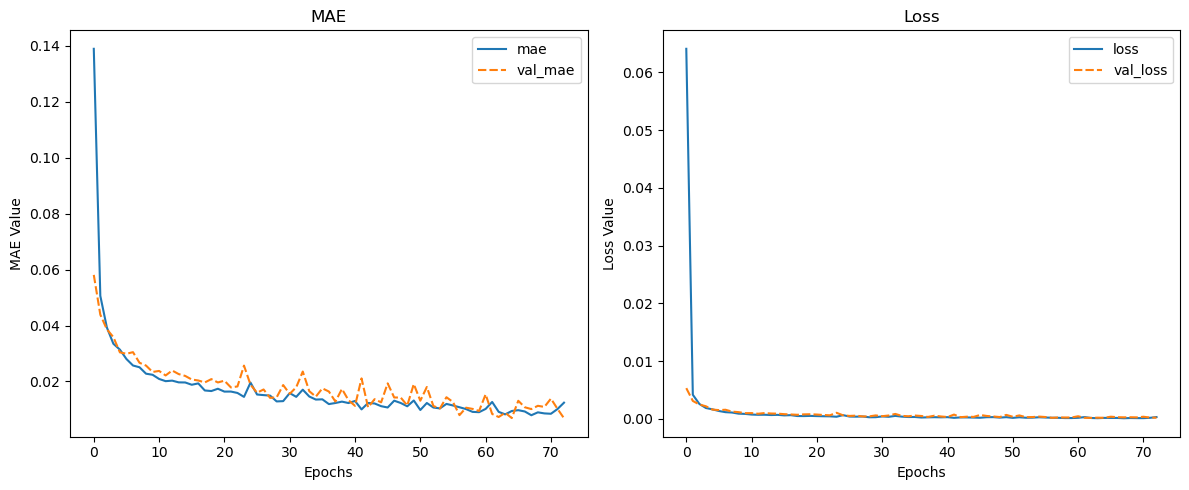

In [18]:
history_df = pd.DataFrame(history.history)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(data=history_df[['mae', 'val_mae']], ax=axes[0])
sns.lineplot(data=history_df[['loss', 'val_loss']], ax=axes[1])
axes[0].set_title('MAE')
axes[1].set_title('Loss')
axes[0].set_xlabel('Epochs')
axes[1].set_xlabel('Epochs')
axes[0].set_ylabel('MAE Value')
axes[1].set_ylabel('Loss Value')
plt.tight_layout()
plt.show()

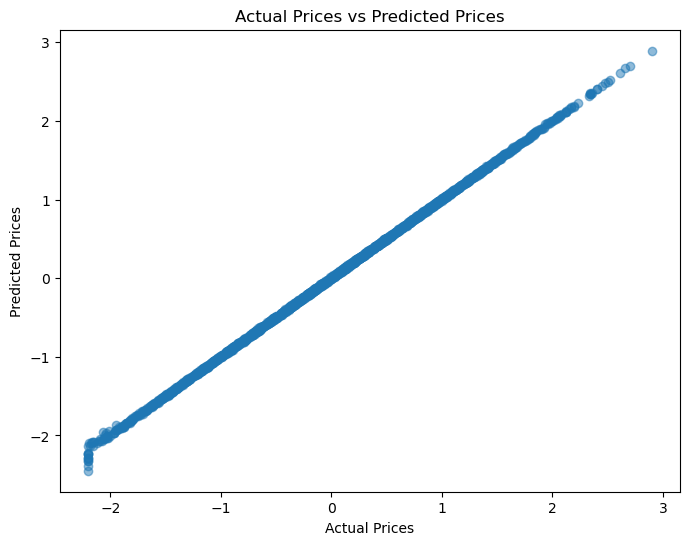

In [19]:
plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(y_test, y_pred, alpha=0.5)

# Add labels and title
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Show the plot
plt.show()